Load the needed packages

In [3]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,8)


This is Kel's iterated definition of the butterfly wasp functions

In [158]:
N=int(40)
m= 9
c= 2.8
d= 0.1
g= 0.6

def ButterflyRate(y):
    bFlies = np.zeros(N)
    for lupe in range(N):
        bFlies[lupe] = (1.0+float(lupe+1)*m/float(N)) * y[lupe]*(1.0-y[lupe]) \
            - (1.0+float(lupe+1)*m/float(N))*y[lupe]*y[N]/(c+(1.0+float(lupe+1)*m/float(N))*y[lupe])
        #rans = (1+2*m/N)*y[1]*(1-y[1]) -(1+2*m/N)*y[1]*y[10]/(c+(1+2*m/N)*y[1])
    return bFlies;

def W(y):
    ans = 0.0
    for lupe in range(N):
        ans += (1.0+float(lupe+1)*m/float(N))*y[lupe]/(c+(1.0+float(lupe+1)*m/float(N))*y[lupe])
    return(-d*y[N] + (g/float(N))*y[N]*ans)

def deriv(t,y):
    B = np.append(ButterflyRate(y),[W(y)])
    return(B) 


The next cell integrates the system using BDF as the integration method.  Unfortunately, it still gives an error for some values of m.  Things do seem to improve for larger values of N. 

In [159]:
yinit = 0.8*np.ones(N+1)

solver = scipy.integrate.ode(deriv)
solver.set_integrator('vode', method='bdf', order=15, nsteps=3000)
solver.set_initial_value(yinit, 0)

tf=200

i = 0
while solver.successful() and solver.t<tf:
    solver.integrate(tf, step=True)
    i += 1
    
K=i
b=np.zeros((K,N+1))
time=np.zeros(K)

solver = scipy.integrate.ode(deriv)
solver.set_integrator('vode', method='bdf', order=15, nsteps=3000)
solver.set_initial_value(yinit, 0)

i=0
while solver.successful() and solver.t<tf:
    solver.integrate(tf, step=True)
    b[i,:]=np.asarray(solver.y)
    time[i] =solver.t
    i += 1


In the cell below, we plot the full butterfly population.

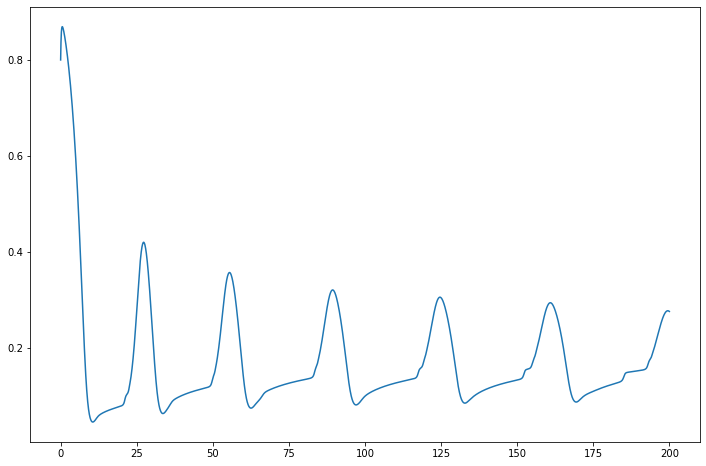

In [160]:
allbflies = b[:,0]

for j in range(N-1):
    allbflies = allbflies +b[:,j+1]

plt.plot(time,allbflies/N);

Now we plot the wasps.

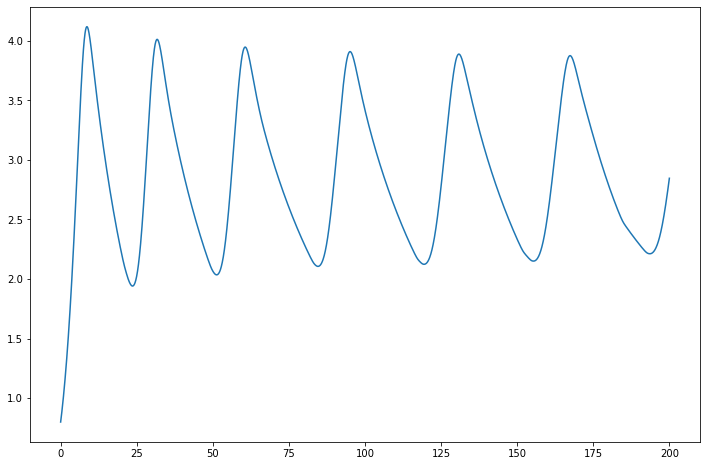

In [161]:
plt.plot(time,b[:,N]);

Finally, we plot the last three cells of the butterflies.

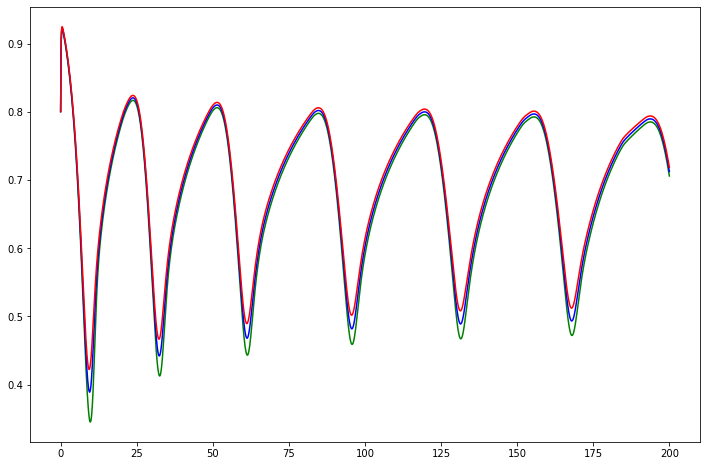

In [162]:
plt.plot(time,b[:,N-3],'g')
plt.plot(time,b[:,N-2],'b')
plt.plot(time,b[:,N-1], 'r');

In the next series, we add the nearest neighbor interaction.  Notice that I am scaling mu by N.  I am not sure this is the right thing to do.

In [163]:

N=int(20)
mu=0.01/N
m=15.0
c=2.8
d= 0.1
g= 0.6

    
def ButterflyRate(y):
    bFlies = np.zeros(N)
    for lupe in range(N):
        # First add the logistic and predation terms.
        bFlies[lupe] = (1.0+float(lupe+1)*m/float(N)) * y[lupe]*(1.0-y[lupe]) \
            - (1.0+float(lupe+1)*m/float(N))*y[lupe]*y[N]/(c+(1.0+float(lupe+1)*m/float(N))*y[lupe])
        
    # Now add the mixing.
    bFlies[0] += mu*(y[1]-y[0])
    for lupe in range(1,N-1):
        bFlies[lupe] += mu*(y[lupe-1]-2.0*y[lupe]+y[lupe+1])
    bFlies[N-1] += mu*(-y[N-1]+y[N])

    return bFlies;

def W(y):
    #ans = -d*y[10]+ (g/N)*y[10]*((1+m/N)*y[0]/(c+(1+m/N)*y[0])+(1+2*m/N)*y[1]/(c+(1+2*m/N)*y[1])+(1+3*m/N)*y[2]/(c+(1+3*m/N)*y[2])+(1+4*m/N)*y[3]/(c+(1+4*m/N)*y[3])+(1+5*m/N)*y[4]/(c+(1+5*m/N)*y[4])+(1+6*m/N)*y[5]/(c+(1+6*m/N)*y[5])+(1+7*m/N)*y[6]/(c+(1+7*m/N)*y[6])+(1+8*m/N)*y[7]/(c+(1+8*m/N)*y[7])+(1+9*m/N)*y[8]/(c+(1+9*m/N)*y[8])+(1+10*m/N)*y[9]/(c+(1+10*m/N)*y[9]))
    ans = 0.0
    for lupe in range(N):
        ans += (1.0+float(lupe+1)*m/float(N))*y[lupe]/(c+(1.0+float(lupe+1)*m/float(N))*y[lupe])
    return(-d*y[N] + (g/float(N))*y[N]*ans)

def deriv(t,y):
    B = np.append(ButterflyRate(y),[W(y)])
    return(B) 


In [164]:
yinit = 0.8*np.ones(N+1)

solver = scipy.integrate.ode(deriv)
solver.set_integrator('vode', method='bdf', order=15, nsteps=3000)
solver.set_initial_value(yinit, 0)

tf=400

i = 0
while solver.successful() and solver.t<tf:
    solver.integrate(tf, step=True)
    i += 1
    
K=i
b=np.zeros((K,N+1))
time=np.zeros(K)

solver = scipy.integrate.ode(deriv)
solver.set_integrator('vode', method='bdf', order=15, nsteps=3000)
solver.set_initial_value(yinit, 0)

i=0
while solver.successful() and solver.t<tf:
    solver.integrate(tf, step=True)
    b[i,:]=np.asarray(solver.y)
    time[i] =solver.t
    i += 1


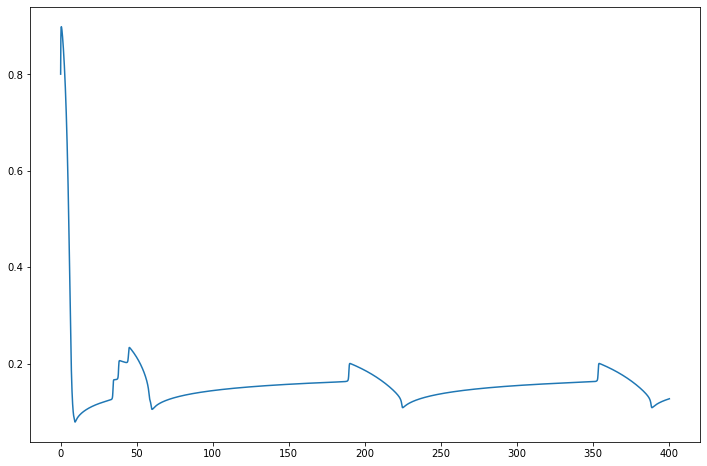

In [165]:
allbflies = b[:,0]

for j in range(N-1):
    allbflies = allbflies +b[:,j+1]

plt.plot(time,allbflies/N);

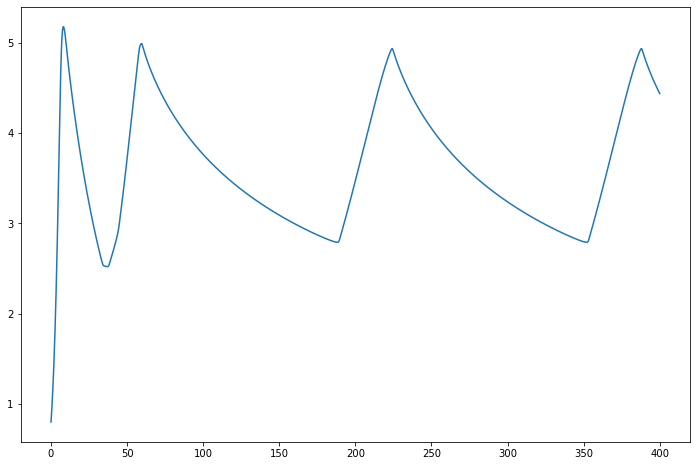

In [166]:
plt.plot(time,b[:,N]);

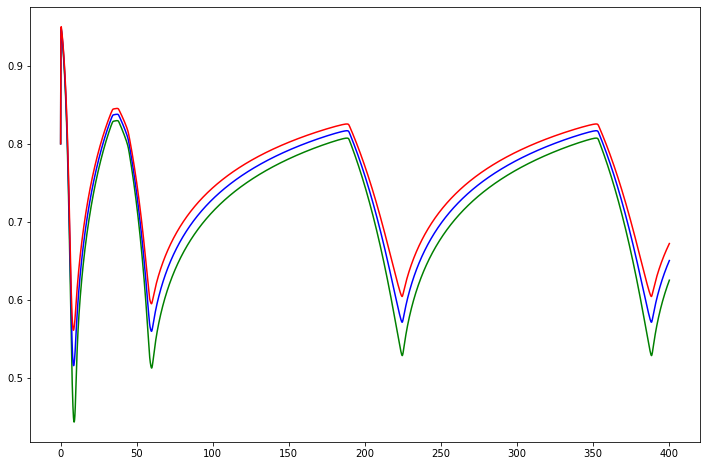

In [167]:
plt.plot(time,b[:,N-3],'g')
plt.plot(time,b[:,N-2],'b')
plt.plot(time,b[:,N-1], 'r');